In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates
import matplotlib.pyplot
import seaborn as sb 
import re
import tensorflow as tf

from bs4 import BeautifulSoup
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import SVC 
from xgboost import XGBClassifier 
from sklearn import metrics 
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score, confusion_matrix, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
df = pd.read_csv('NVIDIA_stock.csv')
df.head(10)

,Date,Open,High,Low,Close,Volume
0,2024-07-15,130.67,131.39,127.18,128.44,203248441.0
1,2024-07-12,128.26,131.92,127.22,129.24,252103100.0
2,2024-07-11,135.75,136.15,127.05,127.40,374782700.0
3,2024-07-10,134.03,135.10,132.42,134.91,248978600.0
4,2024-07-09,130.35,133.82,128.65,131.38,285366600.0
5,2024-07-08,127.49,130.77,127.04,128.20,237677300.0
6,2024-07-05,127.38,128.85,125.68,125.83,214176700.0
7,2024-07-03,121.66,128.28,121.36,128.28,215749000.0
8,2024-07-02,121.13,123.41,121.03,122.67,218374000.0
9,2024-07-01,123.47,124.84,118.83,124.30,284885500.0


In [3]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

In [4]:
df.head(10)

,Date,Open,High,Low,Close,Volume
0,2024-07-15,130.67,131.39,127.18,128.44,203248441.0
1,2024-07-12,128.26,131.92,127.22,129.24,252103100.0
2,2024-07-11,135.75,136.15,127.05,127.40,374782700.0
3,2024-07-10,134.03,135.10,132.42,134.91,248978600.0
4,2024-07-09,130.35,133.82,128.65,131.38,285366600.0
5,2024-07-08,127.49,130.77,127.04,128.20,237677300.0
6,2024-07-05,127.38,128.85,125.68,125.83,214176700.0
7,2024-07-03,121.66,128.28,121.36,128.28,215749000.0
8,2024-07-02,121.13,123.41,121.03,122.67,218374000.0
9,2024-07-01,123.47,124.84,118.83,124.30,284885500.0


In [5]:
# Weryfikacja typów danych
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1281 entries, 0 to 1280
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1281 non-null   datetime64[ns]
 1   Open    1281 non-null   object        
 2   High    1259 non-null   float64       
 3   Low     1259 non-null   float64       
 4   Close   1259 non-null   float64       
 5   Volume  1259 non-null   float64       
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 60.2+ KB


In [19]:
df['Open'] = df['Open'].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1259 entries, 0 to 1280
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1259 non-null   datetime64[ns]
 1   Open    1259 non-null   float64       
 2   High    1259 non-null   float64       
 3   Low     1259 non-null   float64       
 4   Close   1259 non-null   float64       
 5   Volume  1259 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 68.9 KB


In [6]:
# Sprawdzenie rozmiaru danych
df.shape

(1281, 6)

In [20]:
df.describe()


,Date,Open,High,Low,Close,Volume
count,1259,1259.000000,1259.000000,1259.000000,1259.000000,1.259000e+03
mean,2022-01-10 13:21:46.751389952,26.876354,27.376180,26.353900,26.896164,4.537972e+08
min,2019-07-15 00:00:00,3.750000,3.790000,3.680000,3.720000,9.788400e+07
25%,2020-10-10 12:00:00,12.610000,12.845000,12.265000,12.590000,3.209500e+08
50%,2022-01-10 00:00:00,17.700000,18.040000,17.260000,17.810000,4.277130e+08
75%,2023-04-12 12:00:00,30.170000,30.625000,29.430000,30.080000,5.512100e+08
max,2024-07-15 00:00:00,139.800000,140.760000,132.420000,135.580000,1.543911e+09
std,NaN,25.815735,26.281336,25.287672,25.817070,1.855562e+08


In [21]:
# Weryfikacja obecności pustych komórek
df.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [22]:
# Usunięcie wierszy z pustymi komórkami oraz ze zduplikowanymi danymi
df.dropna(axis = 'rows', inplace = True)
df.drop_duplicates(inplace = True)

In [23]:
df.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [24]:
df.shape

(1259, 6)

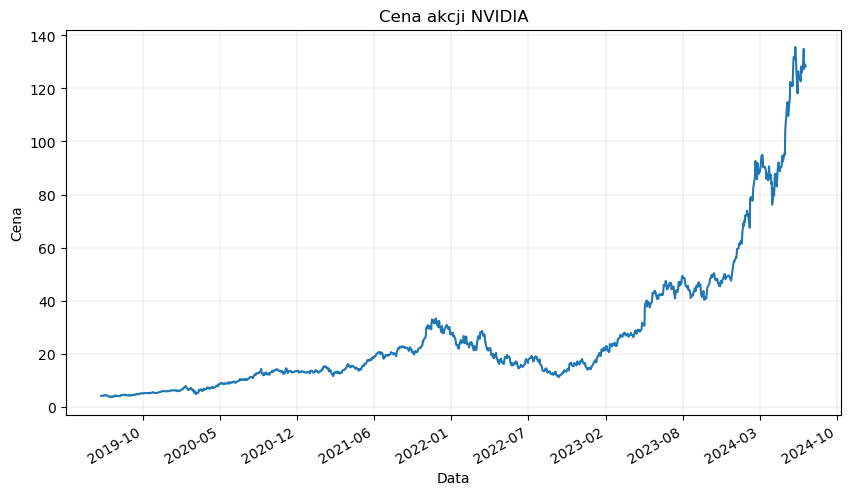

In [25]:
def ukx_plot(df, x_dim, y_dim):
    x = df[x_dim]
    y = df[y_dim]
    fig, ax = plt.subplots(figsize=(10, 5))
    ax.plot(x,y)
    ax.xaxis.set_major_locator(plt.MaxNLocator(12))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    for label in ax.get_xticklabels(which='major'):
        label.set(rotation=30, horizontalalignment='right')
    plt.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)
    plt.xlabel('Data')
    plt.ylabel('Cena')
    plt.title('Cena akcji NVIDIA')
    plt.show()
ukx_plot(df, 'Date', 'Close')

In [26]:
df.head()

,Date,Open,High,Low,Close,Volume
0,2024-07-15,130.67,131.39,127.18,128.44,203248441.0
1,2024-07-12,128.26,131.92,127.22,129.24,252103100.0
2,2024-07-11,135.75,136.15,127.05,127.40,374782700.0
3,2024-07-10,134.03,135.10,132.42,134.91,248978600.0
4,2024-07-09,130.35,133.82,128.65,131.38,285366600.0


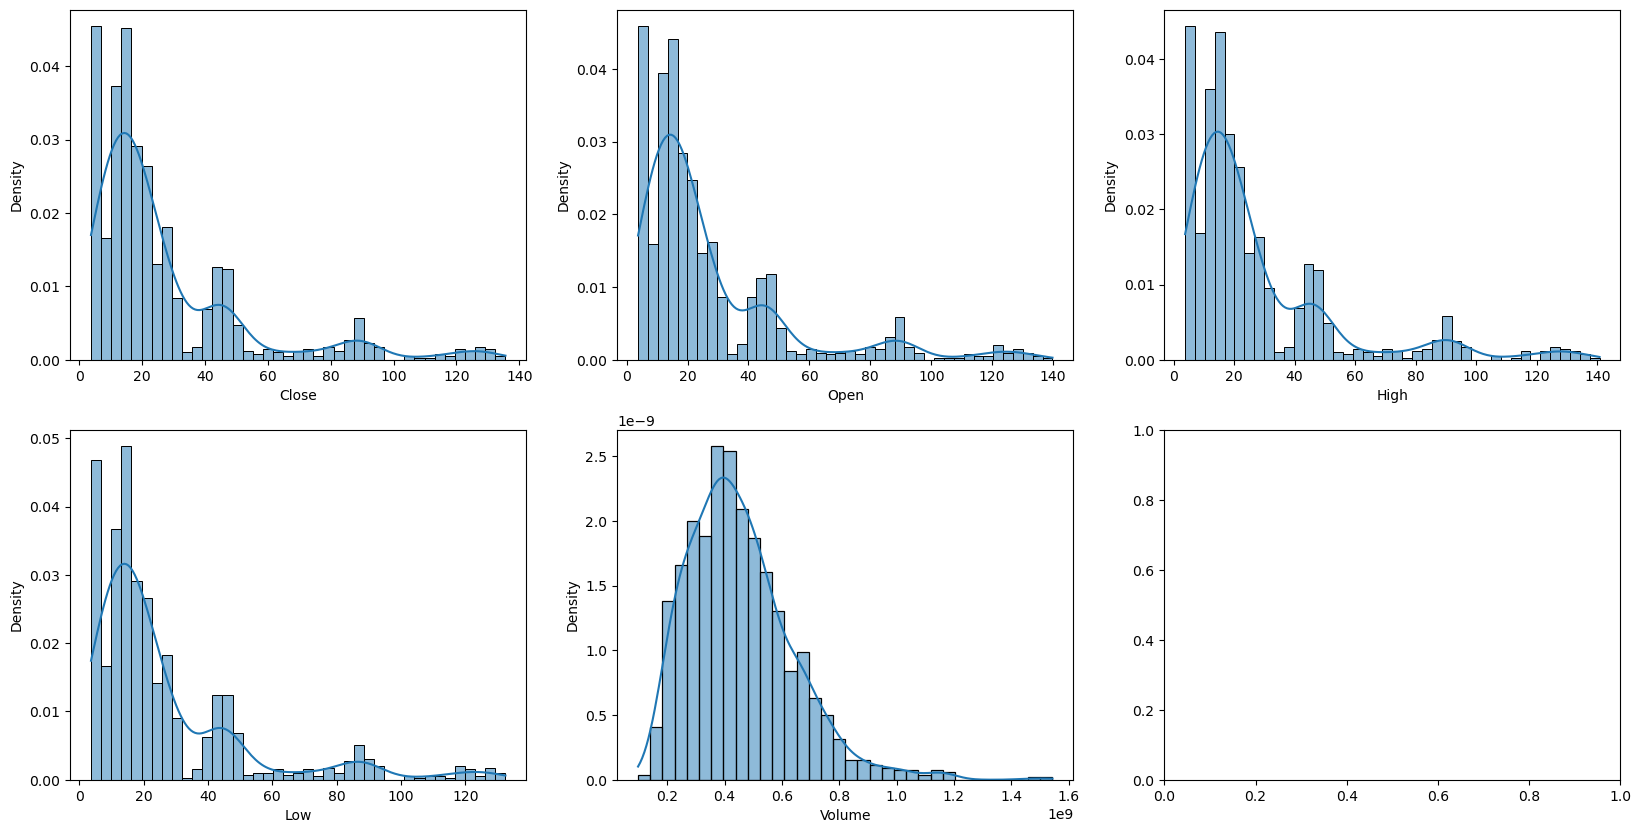

In [27]:
features = ['Close', 'Open', 'High', 'Low', 'Volume']

# Wykresy rozkładu wartości kolumn
plt.subplots(nrows = 2, ncols = 3, figsize=(20, 10))
for i, col in enumerate(features):
    plt.subplot(2,3,i+1)
    
    sb.histplot(df[col], kde = True, stat='density')
plt.show()

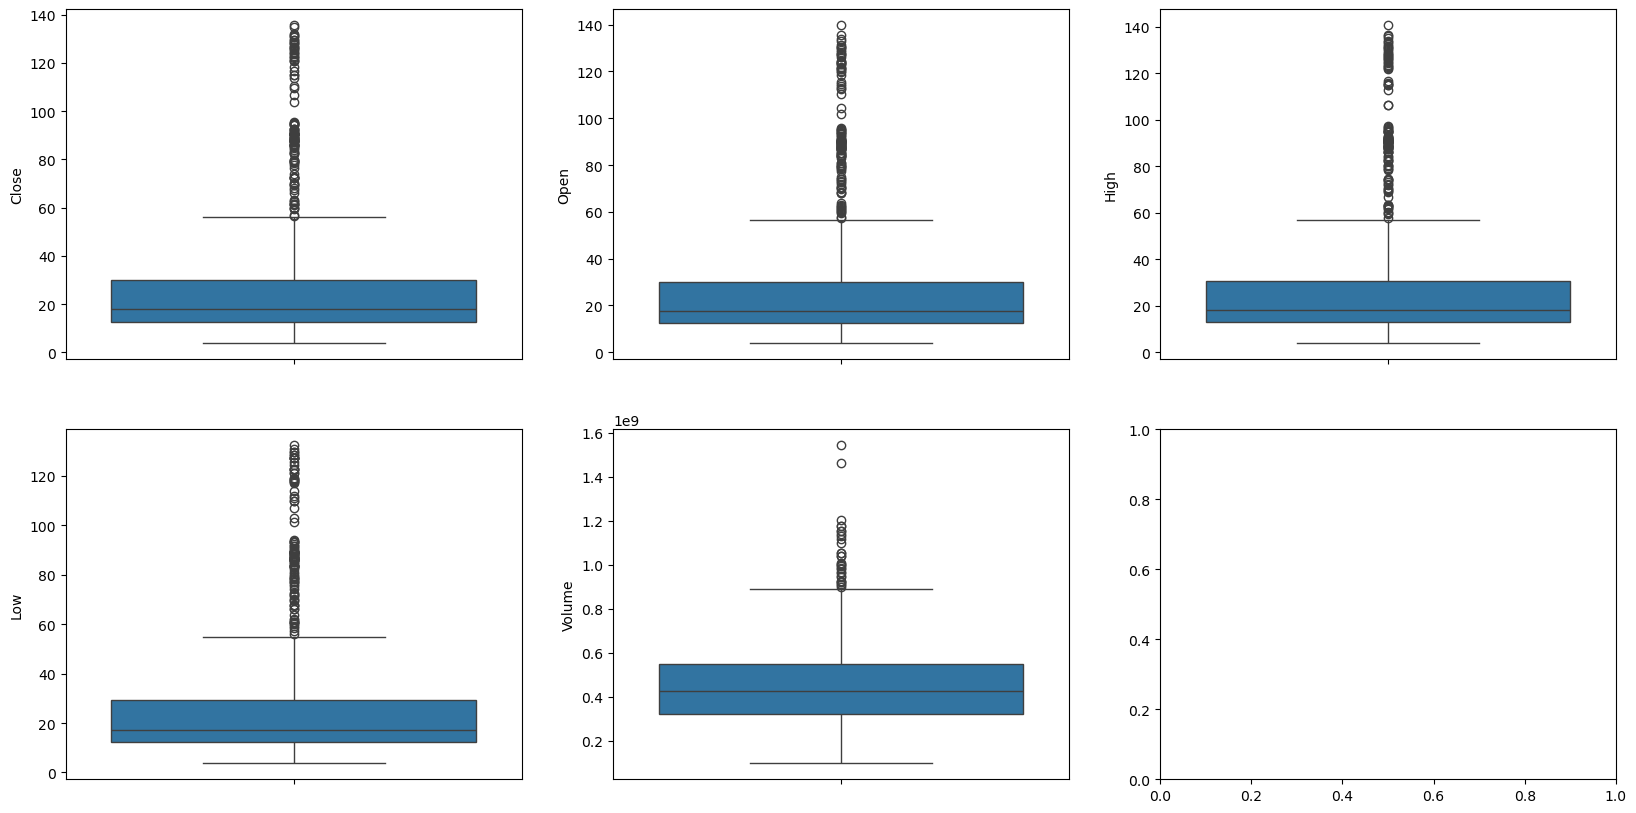

In [39]:
# Wykresy pudełkowe
plt.subplots(nrows = 2, ncols = 3, figsize=(20,10)) 
for i, col in enumerate(features): 
  plt.subplot(2,3,i+1) 
  sb.boxplot(df[col]) 
plt.show()

In [30]:
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year
df.head(1)

,Date,Open,High,Low,Close,Volume,Day,Month,Year
0,2024-07-15,130.67,131.39,127.18,128.44,203248441.0,15,7,2024


In [31]:
df.drop('Date', axis = 1, inplace = True)
df.head(1)

,Open,High,Low,Close,Volume,Day,Month,Year
0,130.67,131.39,127.18,128.44,203248441.0,15,7,2024


In [32]:
df['is_quarter_end'] = np.where(df['Month']%3 == 0, 1, 0)
df.head(10)

,Open,High,Low,Close,Volume,Day,Month,Year,is_quarter_end
0,130.67,131.39,127.18,128.44,203248441.0,15,7,2024,0
1,128.26,131.92,127.22,129.24,252103100.0,12,7,2024,0
2,135.75,136.15,127.05,127.40,374782700.0,11,7,2024,0
3,134.03,135.10,132.42,134.91,248978600.0,10,7,2024,0
4,130.35,133.82,128.65,131.38,285366600.0,9,7,2024,0
5,127.49,130.77,127.04,128.20,237677300.0,8,7,2024,0
6,127.38,128.85,125.68,125.83,214176700.0,5,7,2024,0
7,121.66,128.28,121.36,128.28,215749000.0,3,7,2024,0
8,121.13,123.41,121.03,122.67,218374000.0,2,7,2024,0
9,123.47,124.84,118.83,124.30,284885500.0,1,7,2024,0


In [33]:
df['Open'] = df.Open.astype(float)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1259 entries, 0 to 1280
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Open            1259 non-null   float64
 1   High            1259 non-null   float64
 2   Low             1259 non-null   float64
 3   Close           1259 non-null   float64
 4   Volume          1259 non-null   float64
 5   Day             1259 non-null   int32  
 6   Month           1259 non-null   int32  
 7   Year            1259 non-null   int32  
 8   is_quarter_end  1259 non-null   int32  
dtypes: float64(5), int32(4)
memory usage: 78.7 KB


In [35]:
df.groupby('is_quarter_end').mean()

,Open,High,Low,Close,Volume,Day,Month,Year
is_quarter_end,,,,,,,,
0,26.300036,26.794616,25.799676,26.329712,4.512460e+08,15.711031,6.094724,2021.551559
1,28.007294,28.517412,27.441482,28.007741,4.588036e+08,15.738824,7.440000,2021.475294


In [39]:
df['open-close']  = df['Open'] - df['Close'] 
df['low-high']  = df['Low'] - df['High'] 
df['target'] = np.where(df['Close'].shift(-1) < df['Close'], 1, 0)

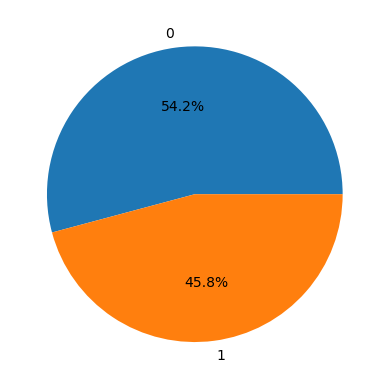

In [40]:
plt.pie(df['target'].value_counts().values,  
        labels=[0, 1], autopct='%1.1f%%') 
plt.show()

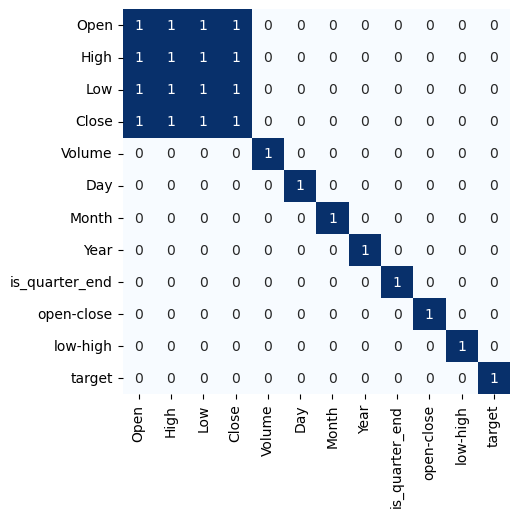

In [41]:
plt.figure(figsize=(5, 5))  
sb.heatmap(df.corr() > 0.9, annot=True, cbar=False , cmap='Blues') 
plt.show() 

In [43]:
# Podział danych
df['target'] = df.target
X = df.drop(columns=['target'])
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [45]:
df.head()

,Open,High,Low,Close,Volume,Day,Month,Year,is_quarter_end,open-close,low-high,target
0,130.67,131.39,127.18,128.44,203248441.0,15,7,2024,0,2.23,-4.21,0
1,128.26,131.92,127.22,129.24,252103100.0,12,7,2024,0,-0.98,-4.70,1
2,135.75,136.15,127.05,127.40,374782700.0,11,7,2024,0,8.35,-9.10,0
3,134.03,135.10,132.42,134.91,248978600.0,10,7,2024,0,-0.88,-2.68,1
4,130.35,133.82,128.65,131.38,285366600.0,9,7,2024,0,-1.03,-5.17,1


In [44]:
# Normalizacja danych
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [120]:
# Tworzenie modeli predykcyjnych
models = [LogisticRegression(), Ridge(alpha = 1.0), XGBClassifier()]

for i in range(3):
    models[i].fit(X_train_scaled, y_train)
    y_pred_model = models[i].predict(X_test_scaled)
    model_pred = (y_pred_model > 0.5).astype(int)

# Dokładność modeli
    accuracy = accuracy_score(y_test, model_pred)
    conf_matrix = confusion_matrix(y_test, model_pred)
    class_report = classification_report(y_test, model_pred)

    print(f'{models[i]} accuracy: {accuracy*100:.2f}%')
    print('Confusion Matrix:')
    print(conf_matrix)
    print('Classification Report:')
    print(class_report)

LogisticRegression() accuracy: 81.35%
Confusion Matrix:
[[ 96  22]
 [ 25 109]]
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.81      0.80       118
           1       0.83      0.81      0.82       134

    accuracy                           0.81       252
   macro avg       0.81      0.81      0.81       252
weighted avg       0.81      0.81      0.81       252

Ridge() accuracy: 76.98%
Confusion Matrix:
[[ 83  35]
 [ 23 111]]
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.70      0.74       118
           1       0.76      0.83      0.79       134

    accuracy                           0.77       252
   macro avg       0.77      0.77      0.77       252
weighted avg       0.77      0.77      0.77       252

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=No

In [118]:
# Sieć neuronowa
early_stopping = EarlyStopping(monitor='val_loss', patience=10, min_delta=0.0001)
model = Sequential()
model.add(Dense(256, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))  # Sigmoid dla klasyfikacji binarnej

optimizer = Adam(learning_rate=0.00001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Trenowanie modelu
history = model.fit(X_train_scaled, y_train, epochs=200, batch_size=2, validation_split=0.2, verbose=1, callbacks=[early_stopping])

Epoch 1/300


C:\Users\kszcz\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


403/403 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.5300 - loss: 0.6919 - val_accuracy: 0.5297 - val_loss: 0.6802
Epoch 2/300
403/403 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5266 - loss: 0.6895 - val_accuracy: 0.5297 - val_loss: 0.6764
Epoch 3/300
403/403 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5748 - loss: 0.6732 - val_accuracy: 0.5297 - val_loss: 0.6733
Epoch 4/300
403/403 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5739 - loss: 0.6769 - val_accuracy: 0.5347 - val_loss: 0.6698
Epoch 5/300
403/403 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5507 - loss: 0.6783 - val_accuracy: 0.5446 - val_loss: 0.6662
Epoch 6/300
403/403 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5582 - loss: 0.6778 - val_accuracy: 0.5446 - val_loss: 0.6625
Epoch 7/300
403/403 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5817 - loss: 0.6664 - val_accuracy: 0.5842 - val_loss: 0.6586
Epoch 8/300
403/403 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5798 - loss: 0.6651 - val_accuracy: 0.5941

In [123]:
# Przewidywanie wartości dla zbioru testowego
y_pred_nn = model.predict(X_test_scaled)
y_pred = (y_pred_nn > 0.5).astype(int)  # Przekształcanie prawdopodobieństw w klasy 0/1

# Obliczanie metryk wydajności
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Neural Network accuracy: {accuracy*100:.2f}%')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Neural Network accuracy: 83.73%
Confusion Matrix:
[[104  14]
 [ 27 107]]
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.88      0.84       118
           1       0.88      0.80      0.84       134

    accuracy                           0.84       252
   macro avg       0.84      0.84      0.84       252
weighted avg       0.84      0.84      0.84       252



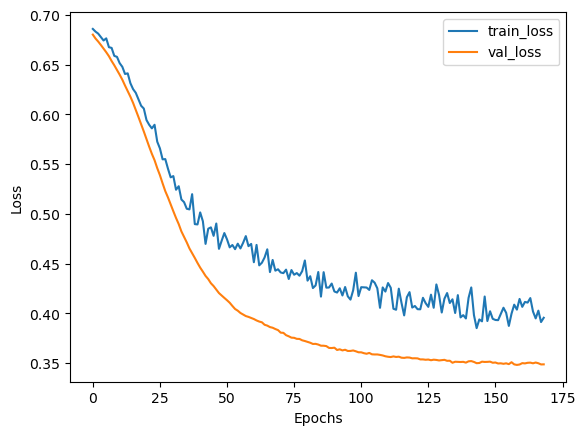

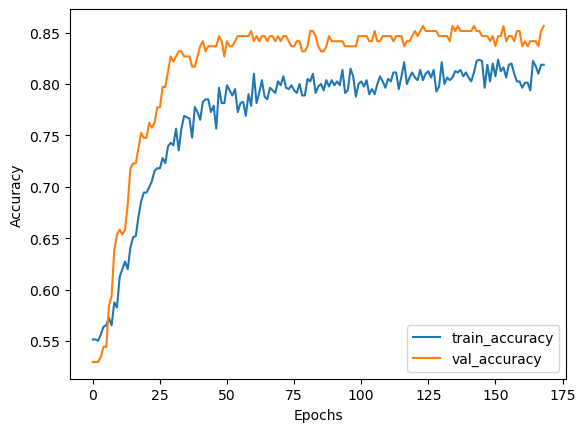

In [121]:
# Wizualizacja straty
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Wizualizacja dokładności
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()